In [39]:
# 1 - Load the data from the clustered location file and split to U.S and Non-US datasets
import pandas as pd

city_data_file = "./data/headline_cities_and_countries.json"
city_location_file = './data/processed_headlines_locations.csv'
location_clustered_file = './data/processed_headlines_location_clustered.csv'

loc_data = pd.read_csv(location_clustered_file, index_col=0)

us_data = loc_data[loc_data["countrycode"] == "US"].copy()
nonus_data = loc_data[loc_data["countrycode"] != "US"].copy()

In [40]:
# 2 - Cluster the data
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

def cluster_location(clusterer, data, lat_string="latitude", lon_string="longitude"):
    features = data[[lat_string, lon_string]].copy()
    clusterer.fit(features)
    data["cluster"] = clusterer.labels_

    return data

In [41]:
# Define the clusterers for U.S and Non-U.S datasets
from sklearn.cluster import DBSCAN

us_clusterer = DBSCAN(eps=3, min_samples=10)
us_data = cluster_location(us_clusterer, us_data)

nonus_clusterer = DBSCAN(eps=10, min_samples=8)
nonus_data = cluster_location(nonus_clusterer, nonus_data)

In [42]:
# 3- Visualize the Clustered Data
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

plt.rcParams["font.size"] = 20

# Map of only the continental US
us_m = Basemap(
    llcrnrlon=-119,
    llcrnrlat=22,
    urcrnrlon=-64,
    urcrnrlat=49,
    projection="lcc",
    lat_1=33,
    lat_2=45,
    lon_0=-95,
)

# U.S
us_data["x"], us_data["y"] = us_m(
    x=list(us_data["longitude"]), y=list(us_data["latitude"])
)

# Out of US
nonus_m = Basemap()

# Convert to map coordinates
nonus_data["x"], nonus_data["y"] = nonus_m(
    x=list(nonus_data["longitude"]), y=list(nonus_data["latitude"])
)

In [43]:
cluster_color_mapping = {
    -1: "k",
    0: "blue",
    1: "green",
    2: "brown",
    3: "purple",
    4: "red",
    5: "orange",
    6: "cyan",
    7: "gray",
}


def plot_clusters(data, basemap):
    plt.figure(figsize=(20, 14))
    plt.rcParams["font.size"] = 24

    basemap.shadedrelief()

    for cluster, grouped in data.groupby("cluster"):
        if cluster > 7:
            cluster = -1
        cluster_color = cluster_color_mapping[cluster]
        label = f"Cluster: {cluster}"

        plt.scatter(
            grouped["x"],
            grouped["y"],
            s=80,
            alpha=1,
            marker="o",
            label=label,
            c=cluster_color,
        )

    ax = plt.gca()
    ax.legend(loc=(1, 0))
    ax.set_title("Locations of Headlines")
    
    return

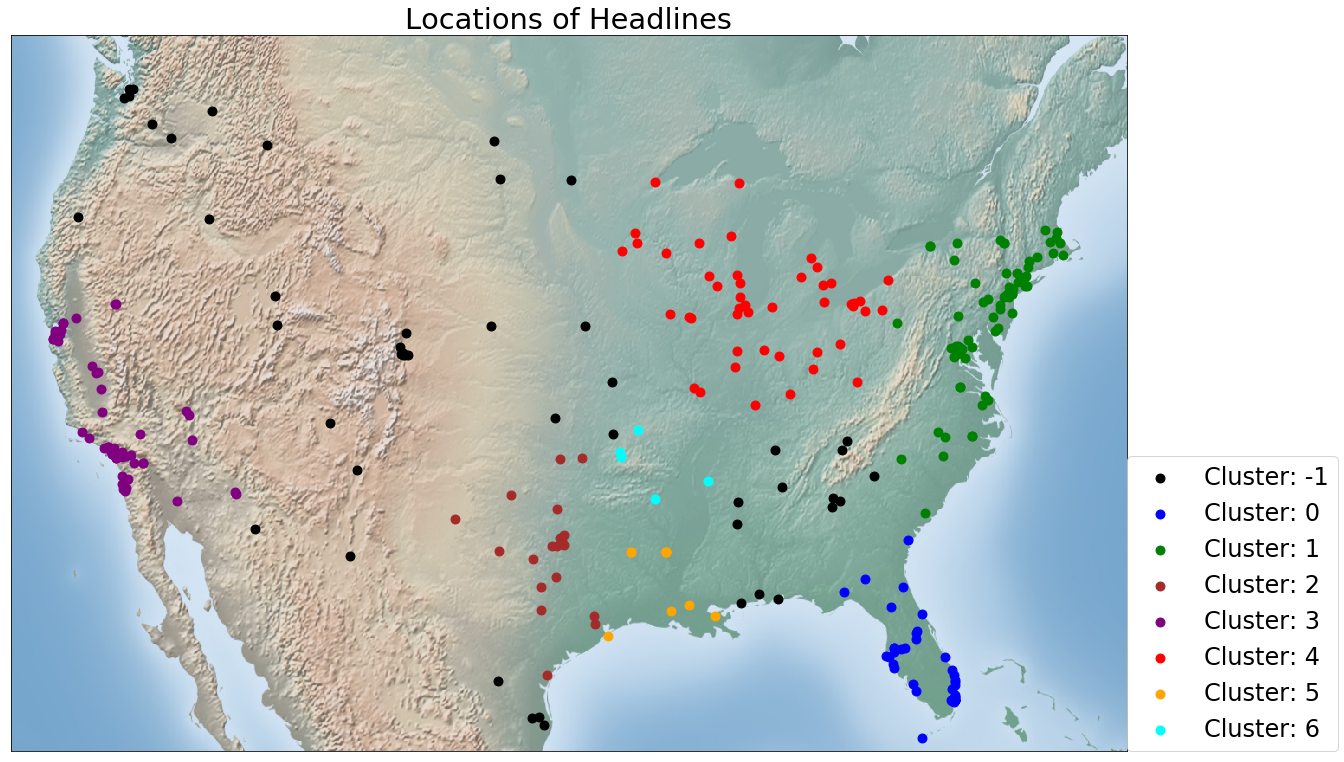

In [44]:
plot_clusters(us_data, us_m)

In [ ]:
plot_clusters(nonus_data, nonus_m)